In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))


Python: 3.9.0 (tags/v3.9.0:9cf6752, Oct  5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]
Pandas: 1.3.5
Numpy: 1.21.5
Sklearn: 1.0.1
Matplotlib: 3.5.1
Keras: 2.7.0


In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [4]:
#อ่านไฟล์ csv 
heart = pd.read_csv('../Project_a/heart.csv')


In [5]:
print(heart.head()) #สามารถปรับเพื่อดูข้อมูลเพิ่มเติมได้ (เริ่มต้นเท่ากับ 5)
#ตัวอย่าง 5 rows

# ตารางประกอบไปด้วย 
# age = อายุ (ปี)
# sex = เพศ (1=ชาย,0=หญิง)
# cp = อาการเจ็บอก (ครั้ง)
# trestbps = ความดันโลหิต (mmHg)
# chol = คอเลสเตอรอลในเลือด (mg/dl)
# fbs = น้ำตาลในเลือดขณะอดอาหาร > 120 มก./ดล.) (1 = จริง 0 = ผิด)
# restecg = ผลการตรวจคลื่นไฟฟ้าหัวใจ
# thalach = อัตราการเต้นของหัวใจสูงสุด
# exang = การออกกำลังกายที่เกิดจากโรคหลอดเลือดหัวใจตีบ (1 = ใช่ 0 = ไม่ใช่)
# oldpeak = การเกิด ST depression จากการออกกำลังกายที่สัมพันธ์กับการพักผ่อน
# slope = ความชันของการออกกำลังกายสูงสุด ST Segment
# ca = (0-3) จำนวนเส้นเลือดที่เห็นจากการทำ flourosopy ( การฉีดสารทึบรังสีแล้วถ่าย x ray ภาพจะออกมาเป็นขาวดำ ) 
# thal = ความผิดปกติของเลือดที่เรียกว่าธาลัสซีเมีย  1 :แก้ไขข้อบกพร่อง(เลือดไม่ไหลเวียนในบางส่วนของหัวใจ),2:กระแสเลือดปกติ,3:ข้อบกพร่องย้อนกลับ(สังเกตการไหลเวียนของเลือดแต่ไม่ปกติ)
# target = (1 = เป็นโรคหัวใจ , 0 = ไม่เป็นโรคหัวใจ)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
#โชว์ตารางตามที่เรากำหนด
heart.loc[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [7]:
#ลบข้อมูลในตารางที่หายไป ที่ระบุเป็นตัว ?
data = heart[~heart.isin(['?'])]
data.loc[1:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [8]:
#นำแถวที่มีไม่มีข้อมูลอยู่ออกจากตาราง
data = data.dropna(axis=0)
data.loc[1:10]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [9]:
#แปลงข้อมูลเป็นตัวเลขและการวิเคราะห์เพิ่มเติม
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# แสดงลักษณะข้อมูลโดยใช้ฟังก์ชัน describe() มาจาก pandas 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


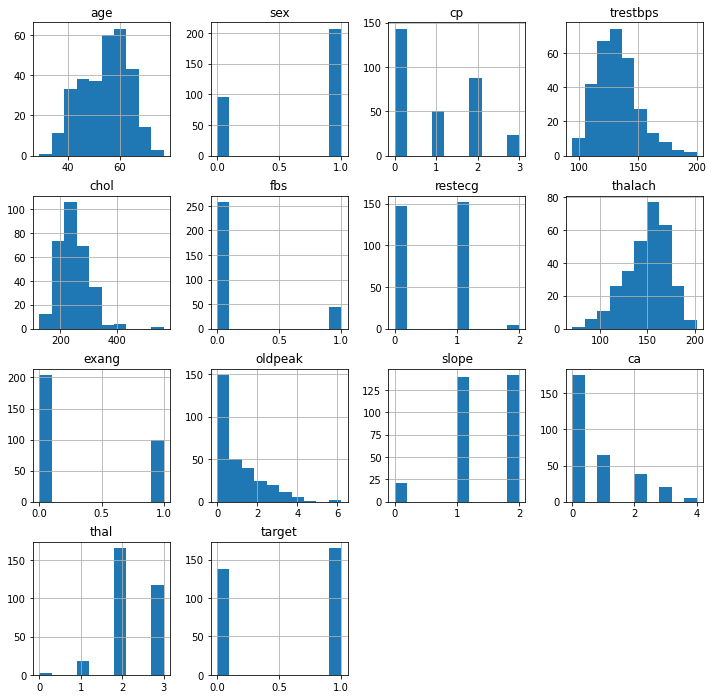

In [11]:
#สร้างกราฟของตัวแปรต่าง ๆ
data.hist(figsize = (12, 12))
plt.show()

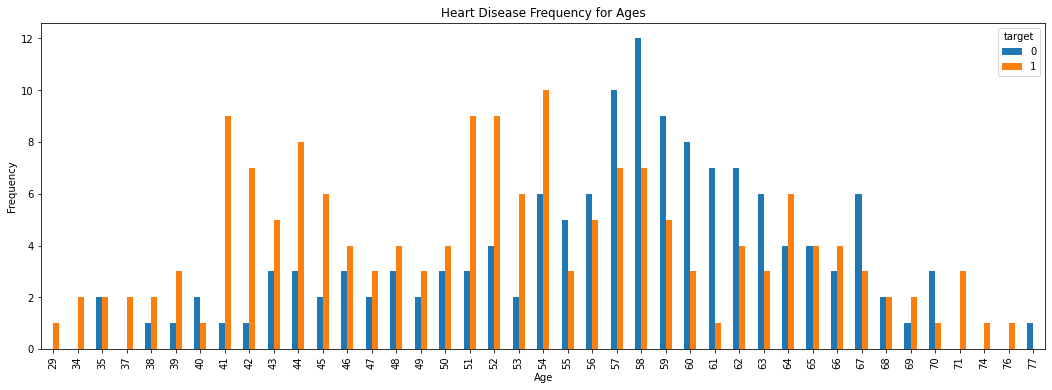

In [12]:

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
X = np.array(data.drop('target',axis = 1))
y = np.array(data['target'])
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [14]:
# การหาค่า X , mean , std 
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [15]:
# สร้างชุดข้อมูลของ X และ Y สำหรับการ training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y , random_state=42, test_size = 0.2)

In [16]:
# แปลงข้อมูลแล้วระบุเป็นหมวดหมู่
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[0:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [17]:
X_train[0]

array([-1.36386876,  0.68100522,  0.03203122, -0.66386682,  0.9418462 ,
       -0.41763453,  0.89896224,  0.54020884, -0.69663055, -0.89686172,
        0.97635214, -0.71442887, -0.51292188])

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers


def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

In [19]:
#ปรับโมเดลให้เข้ากับข้อมูลการ training

history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=30, batch_size=10)

Epoch 1/30
25/25 [==============================] - 2s 14ms/step - loss: 0.6923 - accuracy: 0.5289 - val_loss: 0.6848 - val_accuracy: 0.6721
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.7273 - val_loss: 0.6668 - val_accuracy: 0.8361
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.7562 - val_loss: 0.6295 - val_accuracy: 0.8361
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.7893 - val_loss: 0.5714 - val_accuracy: 0.8689
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.8347 - val_loss: 0.5154 - val_accuracy: 0.8852
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5112 - accuracy: 0.8554 - val_loss: 0.4610 - val_accuracy: 0.8852
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.8306 - val_loss: 0.4187 - val_accuracy: 0.8852
Epoch 8/30
25/25 [=

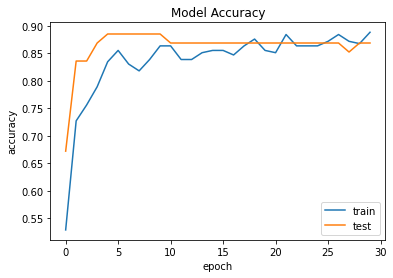

In [20]:
#แสดงกราฟของค่า Accuracy ของ Categorical Model
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

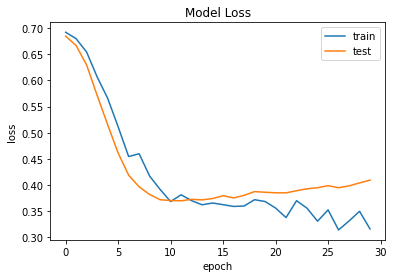

In [21]:
#แสดงกราฟของค่า Loss ของ Categorical Model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [33]:
# แปลงข้อมูลแล้วระบุเป็นแบบไบนารี่

Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[0:10])



[1 0 0 1 0 1 1 1 0 1]


In [23]:
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

In [24]:
#ปรับโมเดลให้เข้ากับข้อมูลการ training
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=30, batch_size=10)

Epoch 1/30
25/25 [==============================] - 2s 15ms/step - loss: 0.6762 - accuracy: 0.5496 - val_loss: 0.6658 - val_accuracy: 0.5246
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.6033 - val_loss: 0.6266 - val_accuracy: 0.6230
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6074 - accuracy: 0.6653 - val_loss: 0.5888 - val_accuracy: 0.7869
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.7686 - val_loss: 0.5559 - val_accuracy: 0.8361
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.5373 - accuracy: 0.7851 - val_loss: 0.5325 - val_accuracy: 0.8689
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5267 - accuracy: 0.7975 - val_loss: 0.5126 - val_accuracy: 0.8689
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.8140 - val_loss: 0.4962 - val_accuracy: 0.8852
Epoch 8/30
25/25 [=

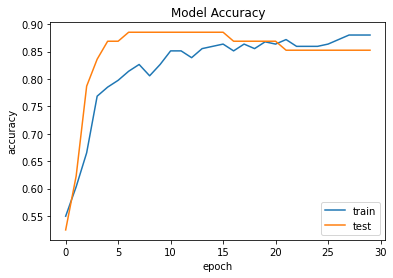

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
#แสดงกราฟของค่า Accuracy ของ Binary Model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

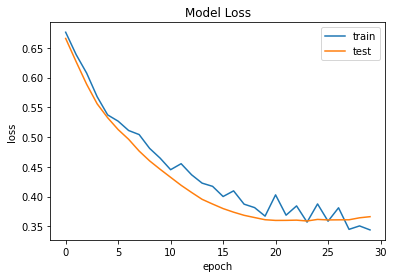

In [26]:
#แสดงกราฟของค่า Loss ของ Binary Model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [31]:

from sklearn.metrics import classification_report, accuracy_score

#สร้างข้อมูลการจัดหมวดหมู่โดยใช้การคาดการณ์สำหรับแบบ Categorical Model
categorical_pred = np.argmax(model.predict(X_test), axis=1)
print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))

Results for Categorical Model
0.8688524590163934


In [28]:

from sklearn.metrics import classification_report, accuracy_score

#สร้างข้อมูลการจัดหมวดหมู่โดยใช้การคาดการณ์สำหรับแบบ binary Model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)
print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))

Results for Binary Model
0.8524590163934426
